In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import datetime

In [3]:
import pytz

In [4]:
!pip install pytz

You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
pytz.timezone('Asia/Seoul')

<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>

In [6]:
pytz.utc

<UTC>

In [7]:
dt = pd.datetime(2018, 1, 1, 0, 0, 0,
           tzinfo=pytz.timezone('Asia/Seoul'))

In [8]:
dt

datetime.datetime(2018, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>)

In [9]:
dt.astimezone(pytz.utc)

datetime.datetime(2017, 12, 31, 15, 32, tzinfo=<UTC>)

In [10]:
dt = datetime.datetime.now()

In [11]:
dt

datetime.datetime(2018, 8, 17, 16, 39, 25, 377223)

In [12]:
dt.astimezone(pytz.UTC)

datetime.datetime(2018, 8, 17, 7, 39, 25, 377223, tzinfo=<UTC>)

In [13]:
from datetime import timezone, datetime, timedelta

In [14]:
datetime(2018, 8, 18, 0,0,tzinfo=timezone(timedelta(hours=9)))

datetime.datetime(2018, 8, 18, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(0, 32400)))

In [15]:
datetime.now()

datetime.datetime(2018, 8, 17, 16, 39, 25, 429751)

In [16]:
datetime.now().astimezone(timezone.utc)

datetime.datetime(2018, 8, 17, 7, 39, 25, 448660, tzinfo=datetime.timezone.utc)

In [17]:
utcnow = datetime.now().astimezone(timezone.utc)

In [18]:
utcnow

datetime.datetime(2018, 8, 17, 7, 39, 25, 462623, tzinfo=datetime.timezone.utc)

In [19]:
utcnow.strftime('%Y-%m-%d %H:%M:%S %Z')

'2018-08-17 07:39:25 UTC'

In [20]:
utcnow.astimezone(pytz.timezone('Asia/Seoul')).strftime('%Y-%m-%d %H:%M:%S %Z')

'2018-08-17 16:39:25 KST'

In [21]:
datetime.today()

datetime.datetime(2018, 8, 17, 16, 39, 25, 505456)

In [22]:
datetime.utcnow()

datetime.datetime(2018, 8, 17, 7, 39, 25, 520866)

In [23]:
today_utc = datetime.utcnow().replace(tzinfo=pytz.utc)

In [24]:
kst = pytz.timezone('Asia/Seoul')

In [25]:
today_kst = today_utc.astimezone(kst)

In [26]:
today_kst

datetime.datetime(2018, 8, 17, 16, 39, 25, 532158, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [27]:
!pip install workalendar

You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [29]:
import workalendar

In [30]:
from workalendar.asia import SouthKorea

In [31]:
cal = SouthKorea()

In [40]:
cal.holidays(year=2049)

[(datetime.date(2049, 1, 1), 'New year'),
 (datetime.date(2049, 2, 1), "Korean New Year's Day"),
 (datetime.date(2049, 2, 2), "Korean New Year's Day"),
 (datetime.date(2049, 2, 3), "Korean New Year's Day"),
 (datetime.date(2049, 3, 1), 'Independence Day'),
 (datetime.date(2049, 5, 5), "Children's Day"),
 (datetime.date(2049, 5, 9), "Buddha's Birthday"),
 (datetime.date(2049, 6, 6), 'Memorial Day'),
 (datetime.date(2049, 8, 15), 'Liberation Day'),
 (datetime.date(2049, 9, 10), 'Midautumn Festival'),
 (datetime.date(2049, 9, 11), 'Midautumn Festival'),
 (datetime.date(2049, 9, 12), 'Midautumn Festival'),
 (datetime.date(2049, 10, 3), 'National Foundation Day'),
 (datetime.date(2049, 10, 9), 'Hangul Day'),
 (datetime.date(2049, 12, 25), 'Christmas Day')]

In [41]:
from pandas.tseries.holiday import Holiday, AbstractHolidayCalendar

In [45]:
rules = [Holiday(title, dt.year, dt.month, dt.day) for dt, title in cal.holidays()]

In [46]:
company_birthday = Holiday('창립기념일', 2018, 7, 19)

In [47]:
rules.append(company_birthday)

In [48]:
class CustomCalendar(AbstractHolidayCalendar):
    rules = rules

In [49]:
cust_cal = CustomCalendar()

In [50]:
cust_cal.holidays()

DatetimeIndex(['2018-01-01', '2018-02-15', '2018-02-16', '2018-02-17',
               '2018-03-01', '2018-05-05', '2018-05-22', '2018-06-06',
               '2018-07-19', '2018-08-15', '2018-09-23', '2018-09-24',
               '2018-09-25', '2018-10-03', '2018-10-09', '2018-12-25'],
              dtype='datetime64[ns]', freq=None)

In [51]:
from pandas.tseries.offsets import CDay

In [52]:
pd.DatetimeIndex(start='2018-01-01', end='2018-12-31',
                freq=CDay(calendar=cust_cal)).to_pydatetime()

array([datetime.datetime(2018, 1, 2, 0, 0),
       datetime.datetime(2018, 1, 3, 0, 0),
       datetime.datetime(2018, 1, 4, 0, 0),
       datetime.datetime(2018, 1, 5, 0, 0),
       datetime.datetime(2018, 1, 8, 0, 0),
       datetime.datetime(2018, 1, 9, 0, 0),
       datetime.datetime(2018, 1, 10, 0, 0),
       datetime.datetime(2018, 1, 11, 0, 0),
       datetime.datetime(2018, 1, 12, 0, 0),
       datetime.datetime(2018, 1, 15, 0, 0),
       datetime.datetime(2018, 1, 16, 0, 0),
       datetime.datetime(2018, 1, 17, 0, 0),
       datetime.datetime(2018, 1, 18, 0, 0),
       datetime.datetime(2018, 1, 19, 0, 0),
       datetime.datetime(2018, 1, 22, 0, 0),
       datetime.datetime(2018, 1, 23, 0, 0),
       datetime.datetime(2018, 1, 24, 0, 0),
       datetime.datetime(2018, 1, 25, 0, 0),
       datetime.datetime(2018, 1, 26, 0, 0),
       datetime.datetime(2018, 1, 29, 0, 0),
       datetime.datetime(2018, 1, 30, 0, 0),
       datetime.datetime(2018, 1, 31, 0, 0),
       datetime.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
airline = pd.read_csv('./data/airline_passengers.csv', index_col='Month')

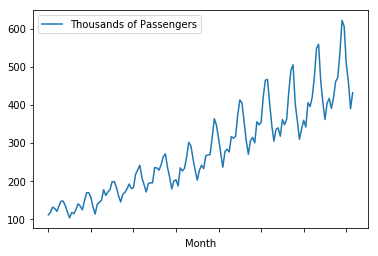

In [56]:
airline.plot()

In [57]:
airline.index = pd.to_datetime(airline.index)

In [58]:
!pip install statsmodels

    100% |████████████████████████████████| 9.6MB 149kB/s ta 0:00:011
    100% |████████████████████████████████| 235kB 2.4MB/s ta 0:00:01
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [66]:
result = seasonal_decompose(airline['Thousands of Passengers'],
                           model='additional')

In [72]:
result.seasonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
1949-06-01    35.402778
1949-07-01    63.830808
1949-08-01    62.823232
1949-09-01    16.520202
1949-10-01   -20.642677
1949-11-01   -53.593434
1949-12-01   -28.619949
1950-01-01   -24.748737
1950-02-01   -36.188131
1950-03-01    -2.241162
1950-04-01    -8.036616
1950-05-01    -4.506313
1950-06-01    35.402778
1950-07-01    63.830808
1950-08-01    62.823232
1950-09-01    16.520202
1950-10-01   -20.642677
1950-11-01   -53.593434
1950-12-01   -28.619949
1951-01-01   -24.748737
1951-02-01   -36.188131
1951-03-01    -2.241162
1951-04-01    -8.036616
1951-05-01    -4.506313
1951-06-01    35.402778
                ...    
1958-07-01    63.830808
1958-08-01    62.823232
1958-09-01    16.520202
1958-10-01   -20.642677
1958-11-01   -53.593434
1958-12-01   -28.619949
1959-01-01   -24.748737
1959-02-01   -36.188131
1959-03-01    -2.241162
1959-04-01    -8.036616
1959-05-01

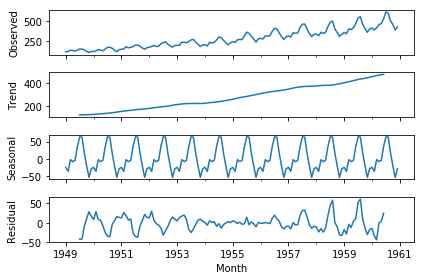

In [73]:
fig = result.plot()

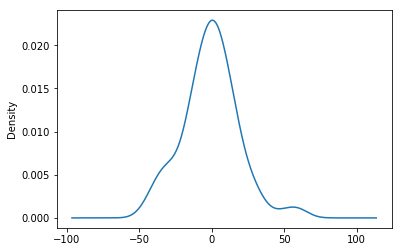

In [75]:
result.resid.plot(kind='kde')

In [77]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### moving average

In [79]:
airline['12month-SMA'] =\
airline['Thousands of Passengers'].rolling(window=12).mean()

In [80]:
airline['5month-SMA'] =\
airline['Thousands of Passengers'].rolling(window=5).mean()

In [81]:
airline['6month-SMA'] =\
airline['Thousands of Passengers'].rolling(window=6).mean()

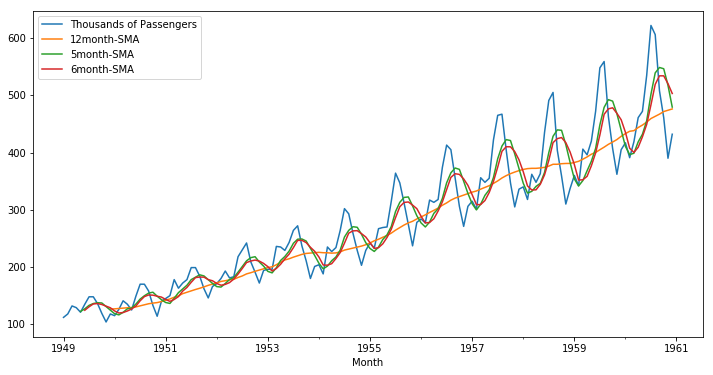

In [83]:
airline.plot(figsize=(12,6))

In [84]:
airline['EWMA12'] = \
airline['Thousands of Passengers'].ewm(span=12).mean()

In [85]:
airline.drop('5month-SMA', axis=1, inplace=True)

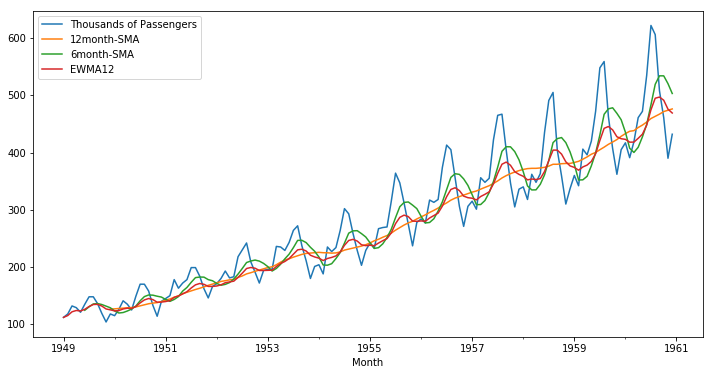

In [86]:
airline.plot(figsize=(12, 6))

In [87]:
airline['EWMA6'] = \
airline['Thousands of Passengers'].ewm(span=6).mean()

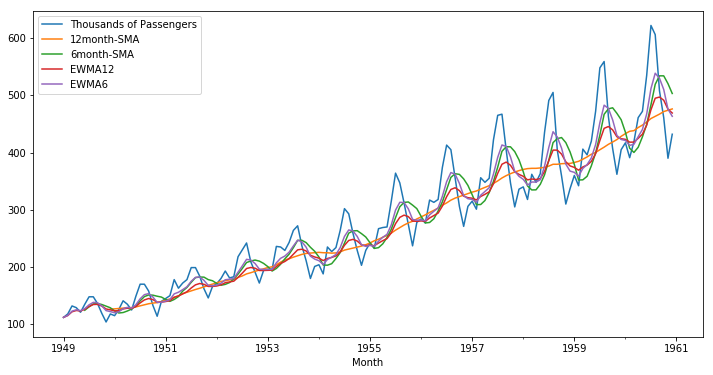

In [88]:
airline.plot(figsize=(12, 6))